# YOLO Models - overview

There's quite a lot YOLO models are trained to do; specifically, there are 5 different
versions of a YOLO model you can use, depending on your task of interest. For example,
for the 11th version of the YOLO models, YOLO11, you can load:

- YOLO("yolo11n.pt"): Standard model, Object detection (with bounding boxes)
- YOLO("yolo11n-cls.pt"): Classification model (no boxes, returns only the class label)
- YOLO("yolo11n-seg.pt"): Segmentation model (returns masks of identified segments)
- YOLO("yolo11n-pose.pt"): Pose estimation model (returns joint positions for human subjects)
- YOLO("yolo11n-obb.pt"): Oriented bounding box (OBB) model (returns detections with tilted bounding boxes)

Let's see what these different models return!

## The standard: object detection

Here's an example for using YOLO11's object detection model. Like before, we open the
video, extract a frame, and then run the model.

In [2]:
import cv2

video_path = "data/guenther_neukirchner_cut.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise ValueError(f"Cannot open video {video_path}")

for i in range(25):
    ret, frame = cap.read()
    if not ret:
        break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


0: 352x640 2 persons, 65.4ms
Speed: 7.3ms preprocess, 65.4ms inference, 0.7ms postprocess per image at shape (1, 3, 352, 640)


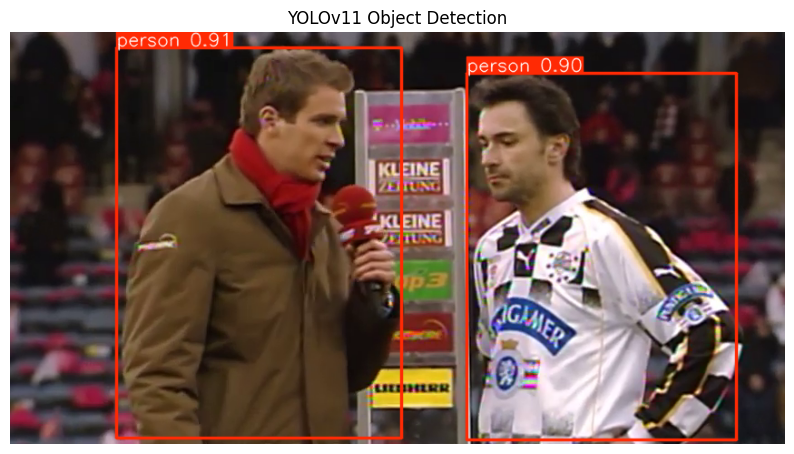

In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_detect = YOLO("yolo11n.pt")           # Object detection model
result = model_detect(frame_rgb)

fig, ax = plt.subplots(figsize=(10, 6))
annotated_frame = result[0].plot()  # returns image with boxes drawn
ax.imshow(annotated_frame)
ax.axis('off')
ax.set_title("YOLOv11 Object Detection")
plt.show()

## Image classification

We know how object detection works; now let's take a look at classification.


0: 224x224 bulletproof_vest 0.17, sweatshirt 0.06, Windsor_tie 0.06, lab_coat 0.06, whistle 0.06, 10.9ms
Speed: 5.1ms preprocess, 10.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


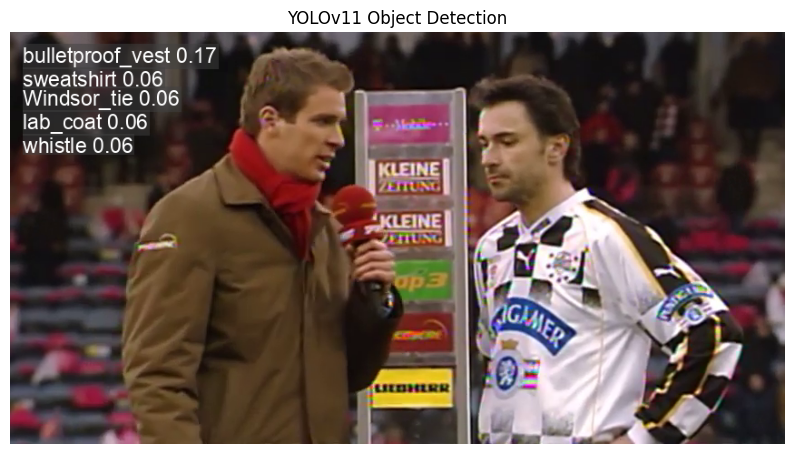

In [6]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_class = YOLO("yolo11n-cls.pt")           # Classification model
result = model_class(frame_rgb)

fig, ax = plt.subplots(figsize=(10, 6))
annotated_frame = result[0].plot()  # returns image with boxes drawn
ax.imshow(annotated_frame)
ax.axis('off')
ax.set_title("YOLOv11 Object Detection")
plt.show()

The YOLO11 classification model is trained on the ImageNet dataset, which doesn't include
classes for persons or humans - as a result, our persons are not found here. However, 
if we check again with the flamingos we had...

In [7]:
import cv2

video_path = "data/flamingo.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise ValueError(f"Cannot open video {video_path}")

for i in range(25):
    ret, frame = cap.read()
    if not ret:
        break
    frame_rgb_flamingo = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


0: 224x224 American_egret 0.34, flamingo 0.34, little_blue_heron 0.13, goose 0.11, drake 0.02, 10.8ms
Speed: 6.0ms preprocess, 10.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


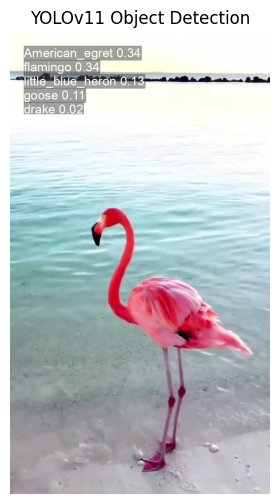

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_class = YOLO("yolo11n-cls.pt")           # Classification model
result = model_class(frame_rgb_flamingo)

fig, ax = plt.subplots(figsize=(10, 6))
annotated_frame = result[0].plot()  # returns image with boxes drawn
ax.imshow(annotated_frame)
ax.axis('off')
ax.set_title("YOLOv11 Object Classification")
plt.show()

That works better, because there are classes in the dataset that match our video. We get
34% accuracy of the object being a flamingo (true), but equally as much probability of
it being an american egret ("Silberreiher).

## Image segmentation

Next, we try image segmentation.


0: 352x640 3 persons, 114.0ms
Speed: 1.4ms preprocess, 114.0ms inference, 4.8ms postprocess per image at shape (1, 3, 352, 640)


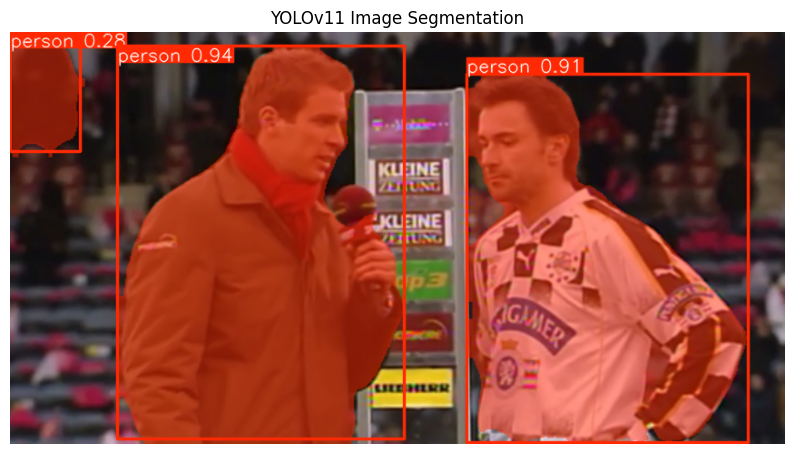

In [9]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_segment = YOLO("yolo11n-seg.pt")            # Segmentation model
result = model_segment(frame_rgb)

fig, ax = plt.subplots(figsize=(10, 6))
annotated_frame = result[0].plot()  # returns image with boxes drawn
ax.imshow(annotated_frame)
ax.axis('off')
ax.set_title("YOLOv11 Image Segmentation")
plt.show()

Here, we not only get the bounding boxes, classes, and probabilities for the respective
objects, we also get a mask of pixels that tells us *exactly* where our class instances
are located in the image!

## Pose estimation

Next: post detection. With this, we try to find the positions of 17 key "landmarks" in
human anatomy (Nose, Left Eye, Right Eye, Left Ear, Right Ear, Left Shoulder,
Right Shoulder, Left Elbow, Right Elbow, Left Wrist, Right Wrist, Left Hip, Right Hip, 
Left Knee, Right Knee, Left Ankle, Right Ankle).


0: 352x640 2 persons, 63.8ms
Speed: 1.2ms preprocess, 63.8ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)


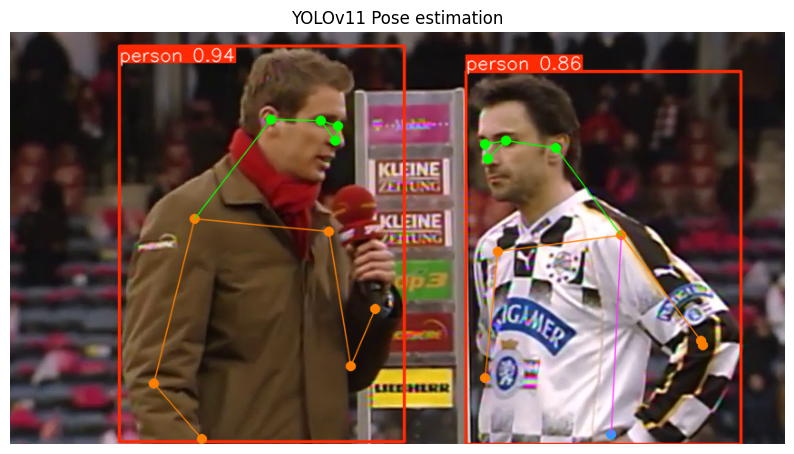

In [10]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_pose = YOLO("yolo11n-pose.pt")    # Pose estimation model
result = model_pose(frame_rgb)

fig, ax = plt.subplots(figsize=(10, 6))
annotated_frame = result[0].plot()  # returns image with boxes drawn
ax.imshow(annotated_frame)
ax.axis('off')
ax.set_title("YOLOv11 Pose estimation")
plt.show()

## Oriented bounding boxes

Last but not least, the oriented bounding boxes model. This is basically the same as the
detection model: we detect bounding boxes for objects in our frame. However, we allow
*tilted* bounding boxes in this approach. Let's take a look.


0: 544x1024 None139.9ms
Speed: 5.9ms preprocess, 139.9ms inference, 6.2ms postprocess per image at shape (1, 3, 544, 1024)


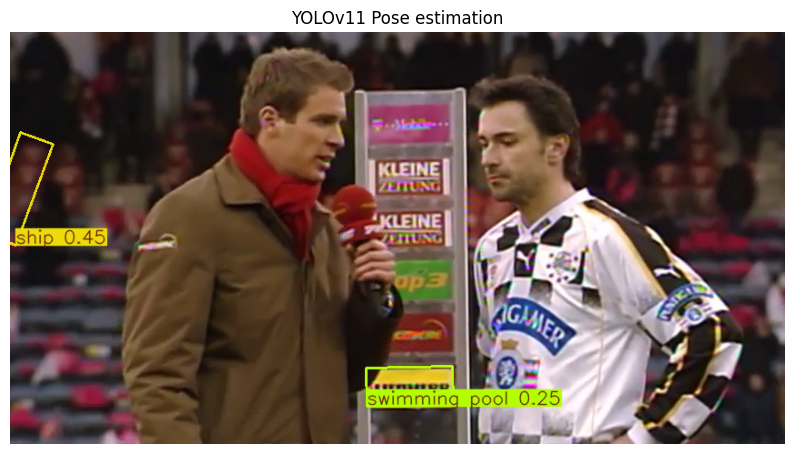

In [11]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_obb = YOLO("yolo11n-obb.pt")    # Oriented bounding boxes model
result = model_obb(frame_rgb)

fig, ax = plt.subplots(figsize=(10, 6))
annotated_frame = result[0].plot()  # returns image with boxes drawn
ax.imshow(annotated_frame)
ax.axis('off')
ax.set_title("YOLOv11 Pose estimation")
plt.show()

Whoopsie! This didn't work so well; the reason for that is that the model is pretrained
on the [DOTAv-Dataset](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/DOTAv1.yaml) using the classes plane, ship, storage tank, baseball diamond, 
tennis court, basketball court, ground track field, harbor, bridge, large vehicle,
small vehicle, helicopter, roundabout, soccer ball field, swimming pool.

The classes look a little weird initially, but seeing as oriented bounding boxes are
a huge topic in traffic and satellite data, the class labels indeed do make sense.


0: 640x1024 None137.1ms
Speed: 5.0ms preprocess, 137.1ms inference, 31.4ms postprocess per image at shape (1, 3, 640, 1024)


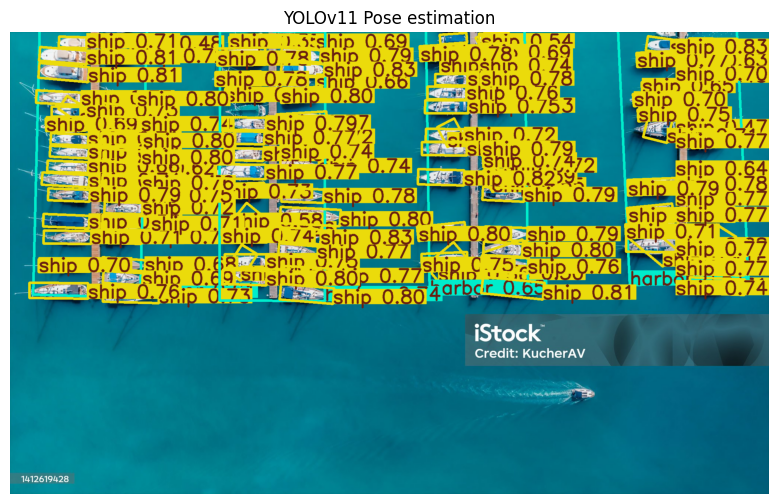

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_obb = YOLO("yolo11n-obb.pt")    # Oriented bounding boxes model
img_path = "data/harbor-bev.png"
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
result = model_obb(img_rgb)

fig, ax = plt.subplots(figsize=(20, 12))
annotated_frame = result[0].plot()  # returns image with boxes drawn
ax.imshow(annotated_frame)
ax.axis('off')
ax.set_title("YOLOv11 Pose estimation")
plt.show()